# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:  https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

Import the necessary libraries and create your dataframe(s).

importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
hotel_df=pd.read_csv("/Users/prathimabharathi/EDAExercises/eda-checkpoint/Hotel Reservations.csv")
hotel_df.head()
hotel_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,1,0,4,85,2018,8,3,1,0,0,0,167.80,1,1
36271,INN36272,2,0,1,3,1,0,1,228,2018,10,17,1,0,0,0,90.95,2,0
36272,INN36273,2,0,2,6,1,0,1,148,2018,7,1,1,0,0,0,98.39,2,1
36273,INN36274,2,0,0,3,0,0,1,63,2018,4,21,1,0,0,0,94.50,0,0


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

##checking to see is there is any missing data in the dataset

In [4]:
hotel_df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
missing=(hotel_df==0).sum()
missing

Booking_ID                                  0
no_of_adults                              139
no_of_children                          33577
no_of_weekend_nights                    16872
no_of_week_nights                        2387
type_of_meal_plan                           0
required_car_parking_space              35151
room_type_reserved                          0
lead_time                                1297
arrival_year                                0
arrival_month                               0
arrival_date                                0
market_segment_type                         0
repeated_guest                          35345
no_of_previous_cancellations            35937
no_of_previous_bookings_not_canceled    35463
avg_price_per_room                        545
no_of_special_requests                  19777
booking_status                              0
dtype: int64

##checking unique values of the column

In [6]:
hotel_df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

##replacing the columns which has string values to integer values

In [4]:
hotel_update_df =hotel_df.replace({"type_of_meal_plan":{"Not Selected":0,"Meal Plan 1":1,"Meal Plan 2":2, "Meal Plan 3":3},
                        "room_type_reserved":{"Room_Type 1":1,"Room_Type 2":2,"Room_Type 3":3,"Room_Type 4":4,"Room_Type 5":5,"Room_Type 6":6,"Room_Type 7":7},
                        "market_segment_type":{"Offline":0,"Online":1, "Corporate":3,"Aviation": 4,"Complementary":5},
                        "booking_status":{"Canceled":0,"Not_Canceled":1}})
hotel_update_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,1,0,4,85,2018,8,3,1,0,0,0,167.80,1,1
36271,INN36272,2,0,1,3,1,0,1,228,2018,10,17,1,0,0,0,90.95,2,0
36272,INN36273,2,0,2,6,1,0,1,148,2018,7,1,1,0,0,0,98.39,2,1
36273,INN36274,2,0,0,3,0,0,1,63,2018,4,21,1,0,0,0,94.50,0,0


In [43]:
hotel_update_df.shape

(36275, 19)

##noticed that there was lot of columns with 0 value, so checking the number of columns with 0 as their value.

In [32]:
missing=(hotel_update_df==0).sum()
missing

Booking_ID                                  0
no_of_adults                              139
no_of_children                          33577
no_of_weekend_nights                    16872
no_of_week_nights                        2387
type_of_meal_plan                        5130
required_car_parking_space              35151
room_type_reserved                          0
lead_time                                1297
arrival_year                                0
arrival_month                               0
arrival_date                                0
market_segment_type                     10528
repeated_guest                          35345
no_of_previous_cancellations            35937
no_of_previous_bookings_not_canceled    35463
avg_price_per_room                        545
no_of_special_requests                  19777
booking_status                          11885
dtype: int64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [5]:
hotel_update_df['lead_time'].describe()

count    36275.000000
mean        85.232557
std         85.930817
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64

##box plot for the entire dataset for checking outliers

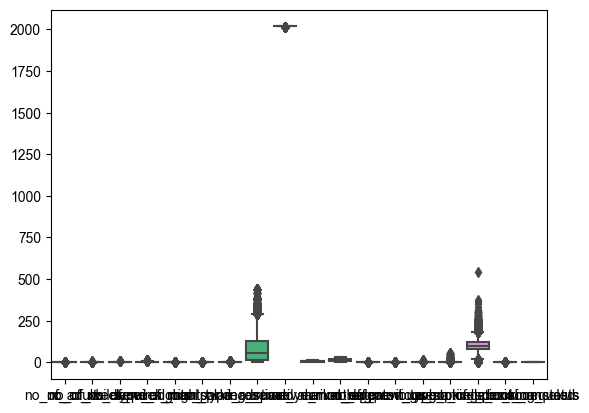

In [6]:
sns.boxplot(data=hotel_update_df)
sns.set(rc={'figure.figsize':(70,12)})

##box plot for leadtime column to check the outliers

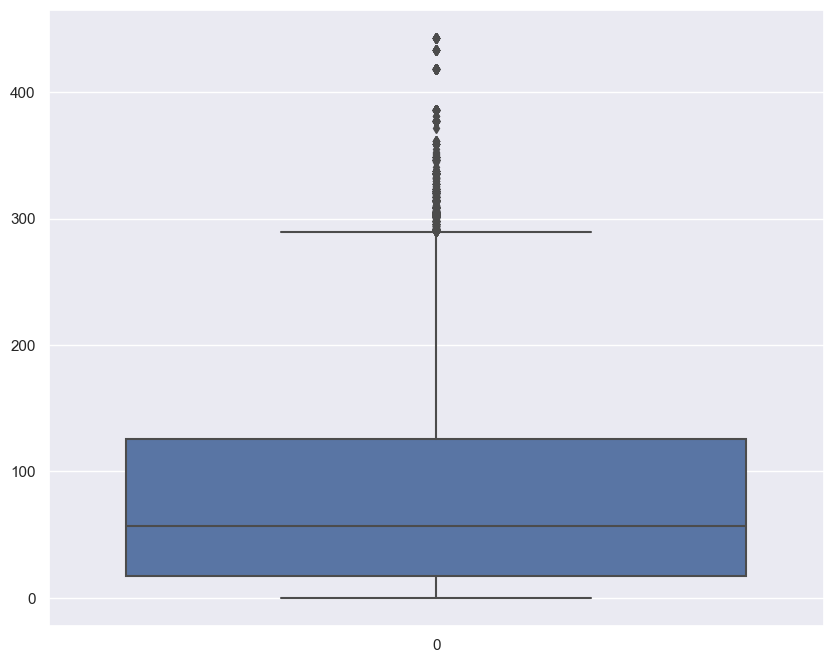

In [83]:
sns.boxplot(data=hotel_update_df['lead_time'])
sns.set(rc={'figure.figsize':(10,8)})

Handling the outliers in the data

##with outliers, we are setting the upper and lower limit for the values with mean and standard deviation of the leadtime so it is closer to other data values in lead time and dropping the outliers which are not in the lower and upper limit

In [21]:
upper_limit=hotel_update_df['lead_time'].mean()+2*hotel_update_df['lead_time'].std()
upper_limit

253.92892947213392

In [22]:
lower_limit=hotel_update_df['lead_time'].mean()-2*hotel_update_df['lead_time'].std()
lower_limit

-84.27531664704287

In [24]:
hotel_update_df['lead_time']=np.where(hotel_update_df['lead_time']>upper_limit,upper_limit, np.where(hotel_update_df['lead_time']<lower_limit,lower_limit,hotel_update_df['lead_time']))

<AxesSubplot: >

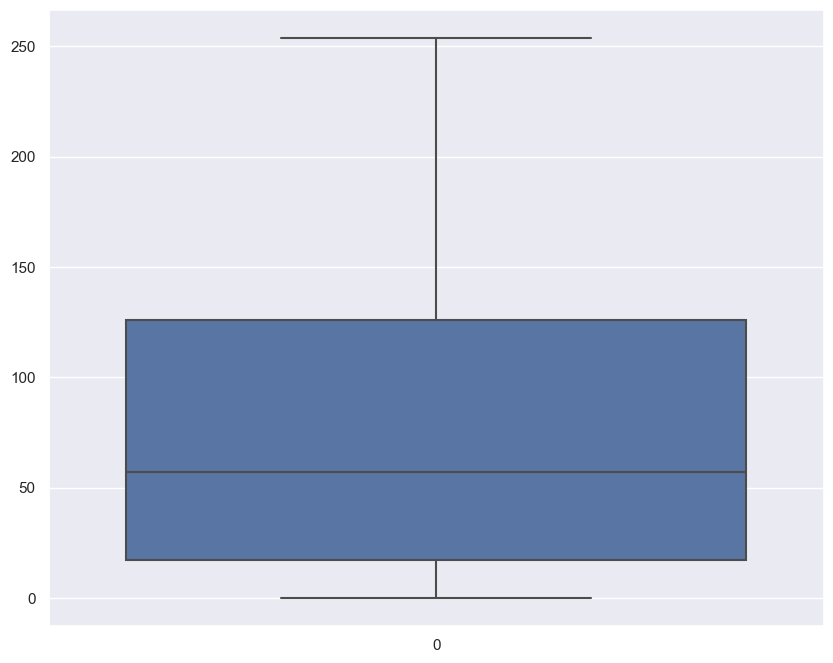

In [25]:
hotel_update_df['lead_time'].describe()
sns.boxplot(data=hotel_update_df['lead_time'])

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

##dropping the columns which mostly has null values or doesnt have enough information to support the analysis

In [7]:
hotel_update_df.drop(['repeated_guest','required_car_parking_space'],axis=1,inplace=True)


In [46]:
hotel_update_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,1,224.0,2017,10,2,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,0,1,5.0,2018,11,6,1,0,0,106.68,1,1
2,INN00003,1,0,2,1,1,1,1.0,2018,2,28,1,0,0,60.00,0,0
3,INN00004,2,0,0,2,1,1,211.0,2018,5,20,1,0,0,100.00,0,0
4,INN00005,2,0,1,1,0,1,48.0,2018,4,11,1,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,1,4,85.0,2018,8,3,1,0,0,167.80,1,1
36271,INN36272,2,0,1,3,1,1,228.0,2018,10,17,1,0,0,90.95,2,0
36272,INN36273,2,0,2,6,1,1,148.0,2018,7,1,1,0,0,98.39,2,1
36273,INN36274,2,0,0,3,0,1,63.0,2018,4,21,1,0,0,94.50,0,0


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

##checking to see if there is any duplicate data in this and looks like there is none

In [55]:
hotel_update_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
36270    False
36271    False
36272    False
36273    False
36274    False
Length: 36275, dtype: bool

array([[<AxesSubplot: title={'center': 'no_of_adults'}>,
        <AxesSubplot: title={'center': 'no_of_children'}>,
        <AxesSubplot: title={'center': 'no_of_weekend_nights'}>,
        <AxesSubplot: title={'center': 'no_of_week_nights'}>],
       [<AxesSubplot: title={'center': 'type_of_meal_plan'}>,
        <AxesSubplot: title={'center': 'room_type_reserved'}>,
        <AxesSubplot: title={'center': 'lead_time'}>,
        <AxesSubplot: title={'center': 'arrival_year'}>],
       [<AxesSubplot: title={'center': 'arrival_month'}>,
        <AxesSubplot: title={'center': 'arrival_date'}>,
        <AxesSubplot: title={'center': 'market_segment_type'}>,
        <AxesSubplot: title={'center': 'no_of_previous_cancellations'}>],
       [<AxesSubplot: title={'center': 'no_of_previous_bookings_not_canceled'}>,
        <AxesSubplot: title={'center': 'avg_price_per_room'}>,
        <AxesSubplot: title={'center': 'no_of_special_requests'}>,
        <AxesSubplot: title={'center': 'booking_status'

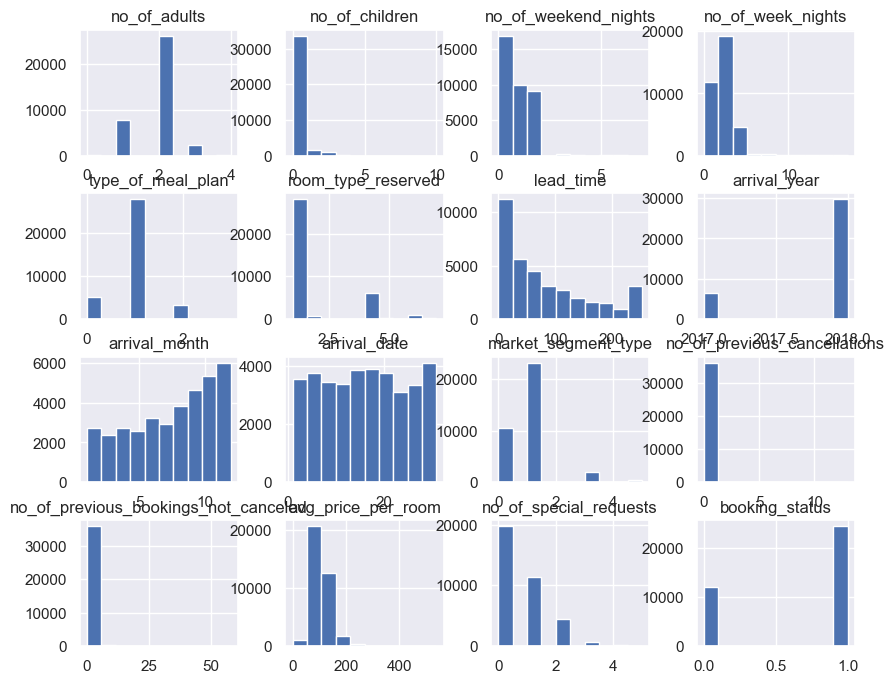

In [49]:
hotel_update_df.hist()

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
The data was clean most of the part.
a.There are missing data in majority of the columns
b.There was some outliers on the leadtime column which I replaced some values to get rid of the outliers.
c.I also checked to see if there is any unneccessary data and dropped 3 columns which had mostly missing data.
d.There was no duplicated data in this dataframe


2. Did the process of cleaning your data give you new insights into your dataset?

I have done some data cleaning that would give me more clear data for further analysis about lead time factors in with repeated guests., which market segment brings in most business and which segment gets most cancellation.



3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

The majority of many columns has lot of null data. I have not dropped those as I want to analyse further to see if they have a role with the cancellation of reservation. 

In [12]:
hotel_update_df.to_csv('/Users/prathimabharathi/EDAExercises/eda-checkpoint/Hotel Reservations.csv',index=False)

In [17]:
hotel_update_df.groupby('no_of_children').count()

,Booking_ID,no_of_adults,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_children,,,,,,,,,,,,,,,,,,
0,33577,33577,33577,33577,33577,33577,33577,33577,33577,33577,33577,33577,33577,33577,33577,33577,33577,33577
1,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618
2,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058
3,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
9,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [9]:
hotel_update_df.to_csv("Cleaned_hotel_reservations.csv")